In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("Data/Real-Data/Real_Combine.csv")

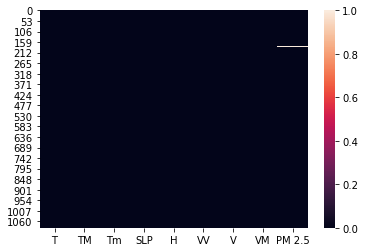

In [3]:
sns.heatmap(df.isnull())

In [4]:
df=df.dropna()

In [5]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
x.head()

,T,TM,Tm,SLP,H,VV,V,VM
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2


In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split as tts

In [7]:
X_train,X_test,y_train,y_test=tts(x,y,test_size=0.2,random_state=1)

In [8]:
Lmodel=LinearRegression()
Lmodel.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
Lmodel.coef_

array([ -0.86294553,   1.31402557,  -6.41079053,  -0.2080099 ,
        -0.90221384, -35.76997608,  -1.54973908,   0.47607599])

In [10]:
Lmodel.intercept_

555.8999678354605

In [11]:
print("Coefficient of determintation R^2 on train set:{}".format(Lmodel.score(X_train,y_train)))

Coefficient of determintation R^2 on train set:0.5157634934625057


In [12]:
print("Coefficient of determintation R^2 on train set:{}".format(Lmodel.score(X_test,y_test)))

Coefficient of determintation R^2 on train set:0.6001544757495438


In [13]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(Lmodel,x,y,cv=5)
score.mean()

0.4710569304807394

In [14]:
predictions=Lmodel.predict(X_test)
#predictions

In [15]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [16]:
#acc=accuracy_score(y_test,predictions)

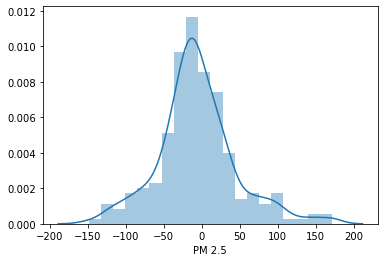

In [17]:
sns.distplot(y_test-predictions)

In [18]:
from sklearn.model_selection import cross_val_score
mse=cross_val_score(Lmodel,x,y,scoring="neg_mean_squared_error",cv=5)
msem=np.mean(mse)
print("FOR LINEAR MODEL: ",msem)


FOR LINEAR MODEL:  -3686.2017773398848


In [19]:
#plt.scatter(x["T"],y)
#plt.plot(X_,predictions,color="red")
#plt.show()

# RIDGE REGRESSSION

In [20]:
from sklearn.linear_model import Ridge,Lasso
Rmodel=Ridge()
Rmodel.fit(X_train,y_train)
mse_RIDGE=cross_val_score(Lmodel,x,y,scoring="neg_mean_squared_error",cv=5)
msem_RIDGE=np.mean(mse_RIDGE)
print("FOR GENRAL RIDGE: ",msem_RIDGE)

FOR GENRAL RIDGE:  -3686.2017773398848


# WITH HELP OF GRIDSEARCHCV

In [21]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
params={"alpha":[1e-15,1e-10,1e-17,1e-120,10,20,30,40,50,100]}

In [22]:
regressor=GridSearchCV(Rmodel,params,scoring="neg_mean_squared_error",cv=5)

In [23]:
regressor.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-17, 1e-120, 10, 20, 30, 40,
                                   50, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [24]:
print(regressor.best_params_)
print(regressor.best_score_)
print("RIDE + GRID")

{'alpha': 1e-10}
-3549.987846629625
RIDE + GRID


# WITH HELP OF RANDOMIZEDSEARCHCV

In [25]:
params_r={"alpha":[1e-15,1e-17,1e-20,10,20,30,40,50,100,50]}
regressor=RandomizedSearchCV(Rmodel,params_r,scoring="neg_mean_squared_error",cv=5)

In [26]:
regressor.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                                   max_iter=None, normalize=False,
                                   random_state=None, solver='auto',
                                   tol=0.001),
                   iid='warn', n_iter=10, n_jobs=None,
                   param_distributions={'alpha': [1e-15, 1e-17, 1e-20, 10, 20,
                                                  30, 40, 50, 100, 50]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring='neg_mean_squared_error',
                   verbose=0)

In [27]:
print(regressor.best_params_)
print(regressor.best_score_)
print("RIDGE + RANDOMCV")

{'alpha': 1e-15}
-3549.9878466296313
RIDGE + RANDOMCV


# Lassomodel=Lasso()


In [28]:
Lasso_model=Lasso()
Lasso_model.fit(X_train,y_train)
mse_LASSO=cross_val_score(Lasso_model,x,y,scoring="neg_mean_squared_error",cv=5)
msem_LASSO=np.mean(mse_LASSO)
print("FOR GENRAL LASSO: ",msem_LASSO)

FOR GENRAL LASSO:  -3666.783253437021


# WITH HELP OF GRIDSEARCV

In [29]:
params={"alpha":[1e-15,1e-10,1e-17,1e-120,10,20,30,40,50,100]}
regressor=GridSearchCV(Lasso_model,params,scoring="neg_mean_squared_error",cv=5)
regressor.fit(X_train,y_train)
print(regressor.best_params_)
print(regressor.best_score_)
print("LASSO+ GRID")

C:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1289837.1839799727, tolerance: 512.1341999708616
  positive)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1233723.2722369423, tolerance: 505.5241100427011
  positive)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1120135.0350474748, tolerance: 496.5674813134352
  positive)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1182781.1207305798, tolerance: 492.4544884696

{'alpha': 1e-10}
-3549.987846629052
LASSO+ GRID


C:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 63509.65804220503, tolerance: 627.2316504708543
  positive)


# WITH HELP OF RANDOM

In [30]:
params={"alpha":[1e-15,1e-10,1e-17,1e-120,10,20,30,40,50,100]}
regressor=RandomizedSearchCV(Lasso_model,params,scoring="neg_mean_squared_error",cv=5)
regressor.fit(X_train,y_train)
print(regressor.best_params_)
print(regressor.best_score_)
print("LASSO+ RANDOM")

C:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1289837.1839799727, tolerance: 512.1341999708616
  positive)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1233723.2722369423, tolerance: 505.5241100427011
  positive)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1120135.0350474748, tolerance: 496.5674813134352
  positive)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1182781.1207305798, tolerance: 492.4544884696

{'alpha': 1e-10}
-3549.987846629052
LASSO+ RANDOM


C:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 63509.65804220503, tolerance: 627.2316504708543
  positive)


In [31]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 38.60107193836128
MSE: 2752.7619673035333
RMSE: 52.466770124561066


In [34]:
import pickle
# open a file, where you ant to store the data
file = open('Lasso_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(regressor, file)